# *Second stage: Machine Learning*
The goal is to predict `SalePrice`.<br>
<br> 
Calling the previous file:

In [1]:
try:
    import ipynb
except:
    !pip install ipynb
    import ipynb

In [3]:
from ipynb.fs.full.Debug import train,test,sample_submission,color

The libraries to apply:

In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

Selecting object attributes: 

In [5]:
obj_attrs=train.select_dtypes(include='object').columns.tolist()

To tranform categorical values into numerical values:

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
for attribute in obj_attrs:
    train[attribute]=le.fit_transform(train[attribute])
    test[attribute]=le.fit_transform(test[attribute])

In [8]:
test.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea
0,5,3,4,882.0,896,896,1,3,1.0,730.0
1,6,3,4,1329.0,1329,1329,1,2,1.0,312.0
2,5,3,2,928.0,928,1629,2,3,2.0,482.0
3,6,3,4,926.0,926,1604,2,2,2.0,470.0
4,8,2,2,1280.0,1280,1280,2,2,2.0,506.0


In [9]:
train.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea,SalePrice
0,7,2,2,856,856,1710,2,2,2,548,208500
1,6,3,2,1262,1262,1262,2,3,2,460,181500
2,7,2,2,920,920,1786,2,2,2,608,223500
3,7,3,4,756,961,1717,1,2,3,642,140000
4,8,2,2,1145,1145,2198,2,2,3,836,250000


In [10]:
sample_submission.head()

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977


To ignore warnings:

In [11]:
import warnings
warnings.filterwarnings('ignore')

It will be only applyed supervised methods as follow:
- *Random Forest*  
- K-Nearest Neighbor 

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold,cross_val_score

In [13]:
X=train.loc[:,'OverallQual':'GarageArea']
y=train.loc[:,'SalePrice']

## 1.Random Forest

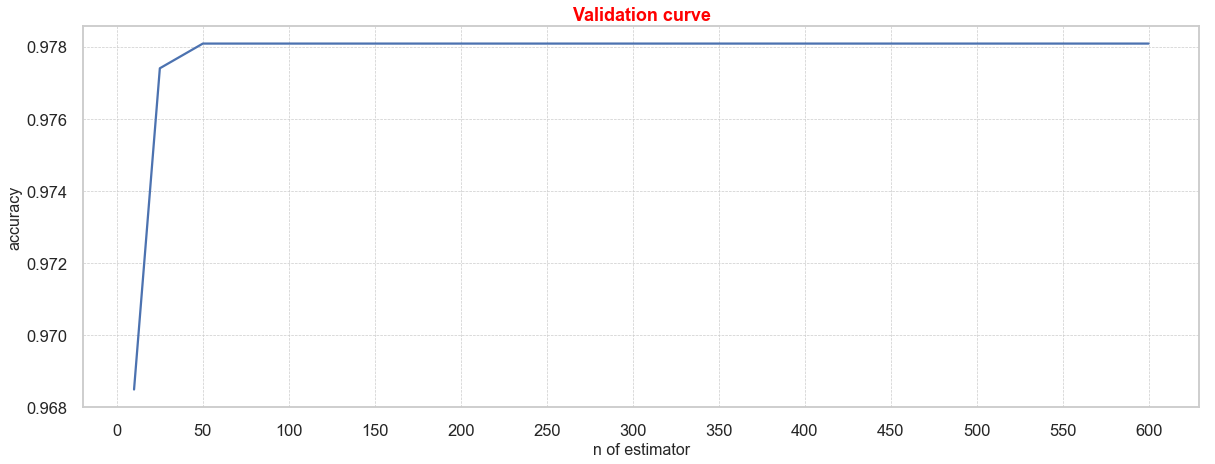

Wall time: 2min 44s


In [14]:
%%time
N=[10,25,50,100,300,400,500,600]
scores=[]
for n in N:
    rf= RandomForestClassifier(n_estimators=n)
    rf.fit(X,y)
    scores.append(rf.score(X,y))
plt.figure(figsize=(20,7))
plt.plot(N, scores) 
plt.title('Validation curve',fontsize=18,color='red',fontweight="bold")
plt.xlabel('n of estimator',fontsize=16)
plt.xticks(np.arange(0,650,step=50))
plt.ylabel('accuracy',fontsize=16)
plt.grid(ls='--',lw=0.7)    
plt.show()    

Evaluating for n of estimator equals 600:

In [15]:
RF= RandomForestClassifier(n_estimators=600)
RF.fit(X,y)
y_teoric=RF.predict(test)
error=mean_absolute_error(y_teoric,sample_submission)
print('n=600:\nAvg error=',color.CYAN + color.BOLD + str(round(error,3)) + color.END)

n=600:
Avg error= 55102.998


## 2.K-Nearest Neighbor:

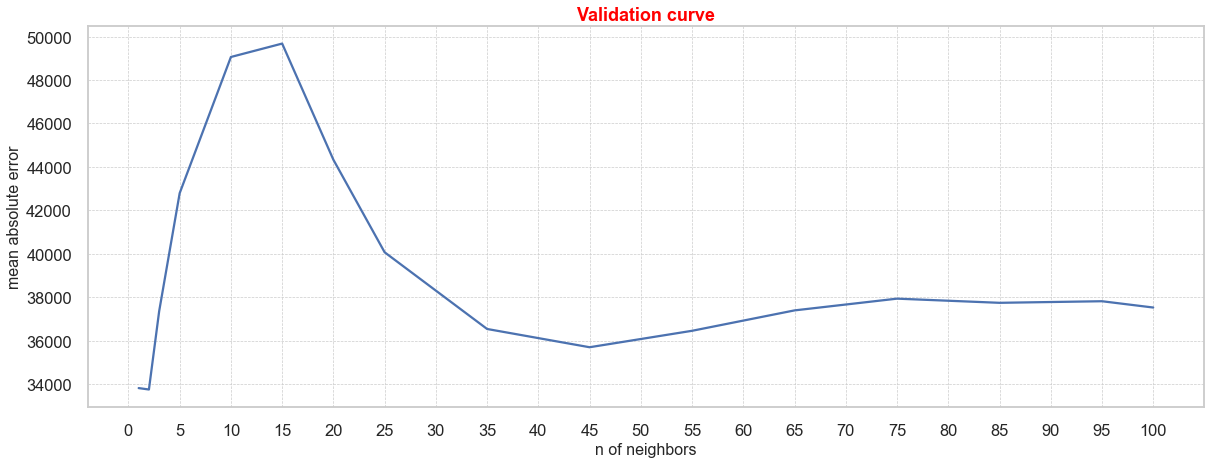

Wall time: 6.59 s


In [16]:
%%time
crossvalidation=KFold(n=X.shape[0],n_folds=10,shuffle=True)
N=[1,2,3,5,10,15,20,25,35,45,55,65,75,85,95,100]
scores=[]
for n in N:
    knn= KNeighborsClassifier(n_neighbors=n)
    knn.fit(X,y)
    score=np.mean(cross_val_score(knn,X,y,scoring='mean_absolute_error',cv=crossvalidation))
    scores.append(score*(-1))
plt.figure(figsize=(20,7))
plt.plot(N, scores) 
plt.title('Validation curve',fontsize=18,color='red',fontweight="bold")
plt.xlabel('n of neighbors',fontsize=16)
plt.xticks(np.arange(0,105,step=5))
plt.ylabel('mean absolute error',fontsize=16)
plt.grid(ls='--',lw=0.7)    
plt.show()    

I consider that to avoid overfiting. In this case, it's convenience in choosing **the value of 100**.

In [17]:
KNN= KNeighborsClassifier(n_neighbors=100)
KNN.fit(X,y)
y_teoric=KNN.predict(test)
error=mean_absolute_error(y_teoric,sample_submission)
print('n=100:\nAvg error=',color.CYAN+ color.BOLD + str(round(error,3)) + color.END)

n=100:
Avg error= 37090.815


Therefore the method that shows advantages both in accuracy and in calculation time is **KNN**
## Analizing prediction errors

In [18]:
dif_errors= sample_submission.SalePrice - y_teoric
errors=pd.DataFrame({'dif_errors':dif_errors})
errors['description']=np.where(errors.dif_errors <0,'underpriced','overpriced')

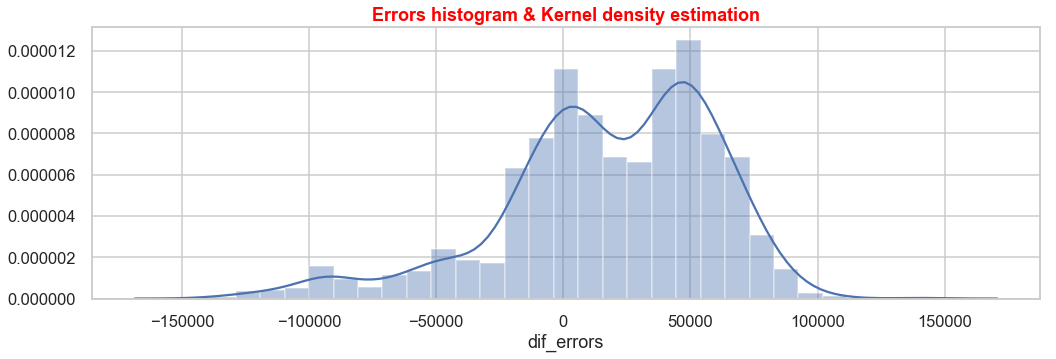

median= 22582.3


In [19]:
plt.figure(figsize=(17,5))
plt.title('Errors histogram & Kernel density estimation',fontsize=18,color='red',fontweight="bold")
sns.distplot(errors.dif_errors)
plt.show()
median=round(errors.dif_errors.median(),1)
print('median=',color.PURPLE+color.BOLD + str(median)+color.END)

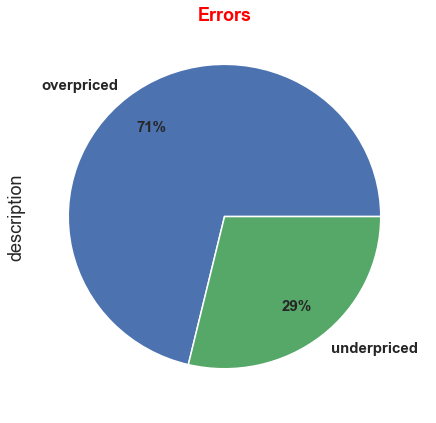

In [20]:
errors.description.value_counts().plot.pie(figsize=(7,7),autopct='%1.0f%%',textprops={'fontweight':'bold','fontsize': 15},
                                           pctdistance=0.75)
plt.title('Errors',fontsize=18,color='red',fontweight="bold")
plt.show()